In [2]:
import os
import sys

sys.path.append('../..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from scipy.io import wavfile
from pylab import*
import IPython
# from pymir import *

In [3]:
def get_en_filepath(gender, num):
        return "../../data/us-"+gender+"/arctic_a"+str(num).zfill(4)+".wav"
def get_hi_filepath(gender, num):
        return "../../data/hi-"+gender+"/hindi_"+str(num).zfill(4)+".wav"
# IPython.display.Audio(get_en_filepath("female",1))

In [4]:
def plot_amp(gender, num):
    samplerate, data = wavfile.read(get_en_filepath(gender,num))
    times = np.arange(len(data))/float(samplerate)

    # Make the plot
    # You can tweak the figsize (width, height) in inches
    plt.figure(figsize=(30, 10))
    plt.fill_between(times, data, data, color='k') 
    plt.xlim(times[0], times[-1])
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    plt.savefig('../../outputs/'+gender+'_'+str(num).zfill(4)+'amp.png', dpi=100)
    plt.show()

In [5]:
def plotSpectru(y,Fs):
    n = len(y) # lungime semnal
    k = arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(n/2)] # one side frequency range

    Y = fft(y)/n # fft computing and normalization
    Y = Y[range(n/2)]

    plot(frq,abs(Y),'r') # plotting the spectrum
    xlabel('Freq (Hz)')
    ylabel('|Y(freq)|')

def plot_fre(gender,num):
    rate,data=wavfile.read(get_en_filepath(gender,num))
    y=data
    lungime=len(y)
    timp=len(y)/rate
    t=linspace(0,timp,len(y))
    
    plt.figure(figsize=(20, 10))
    subplot(2,1,2)
    plotSpectru(y,rate)
    show()
#     plt.savefig('../outputs/'+gender+'_'+str(num).zfill(4)+'fre.png', dpi=100)

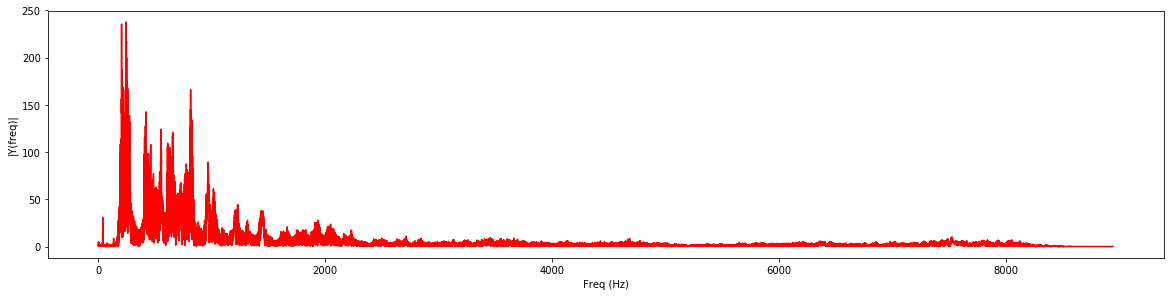

In [6]:
plot_fre("female",1)

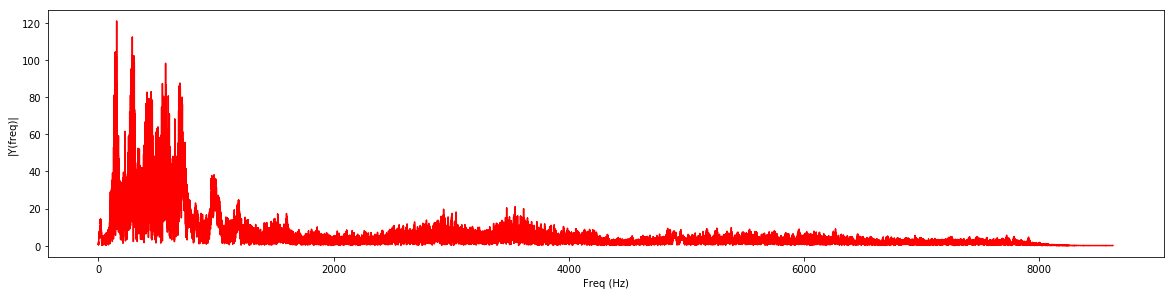

In [7]:
plot_fre("male",1)

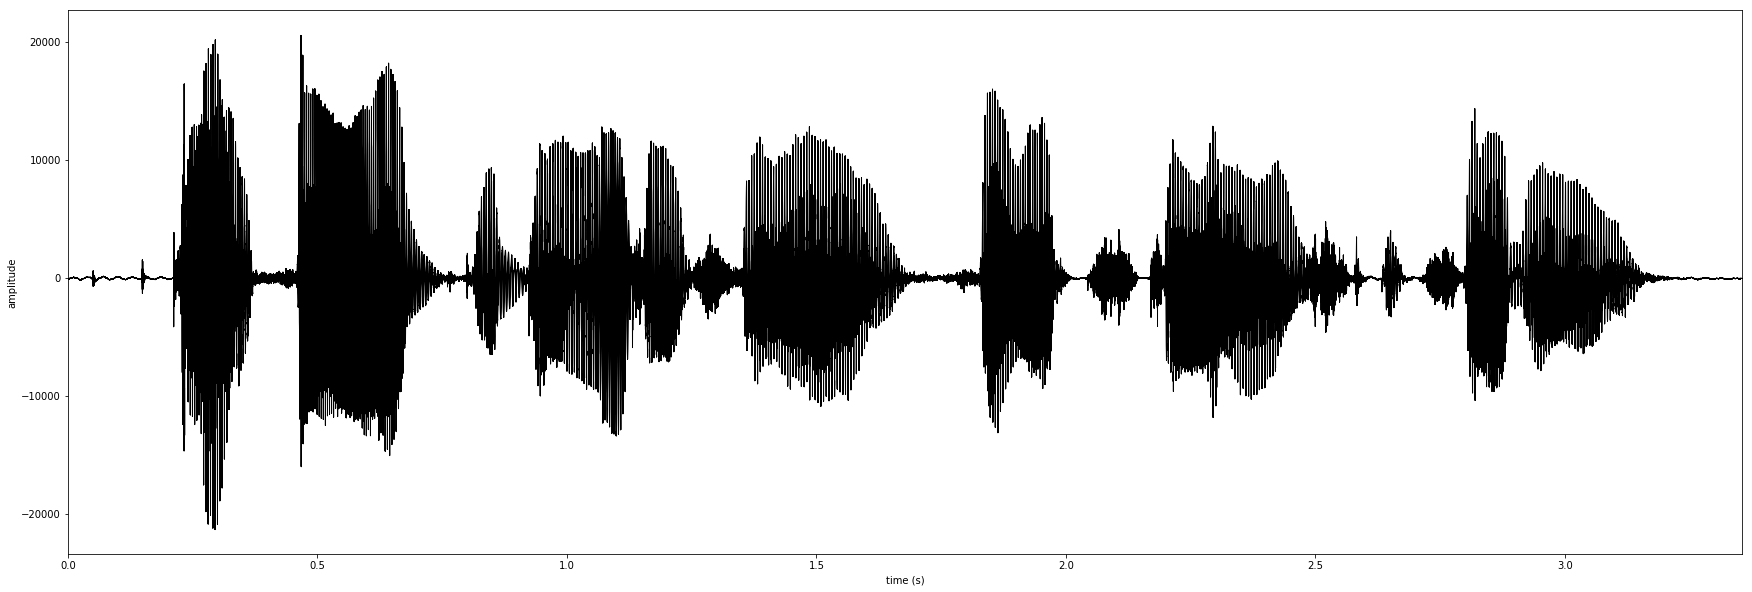

In [8]:
plot_amp("female",1)

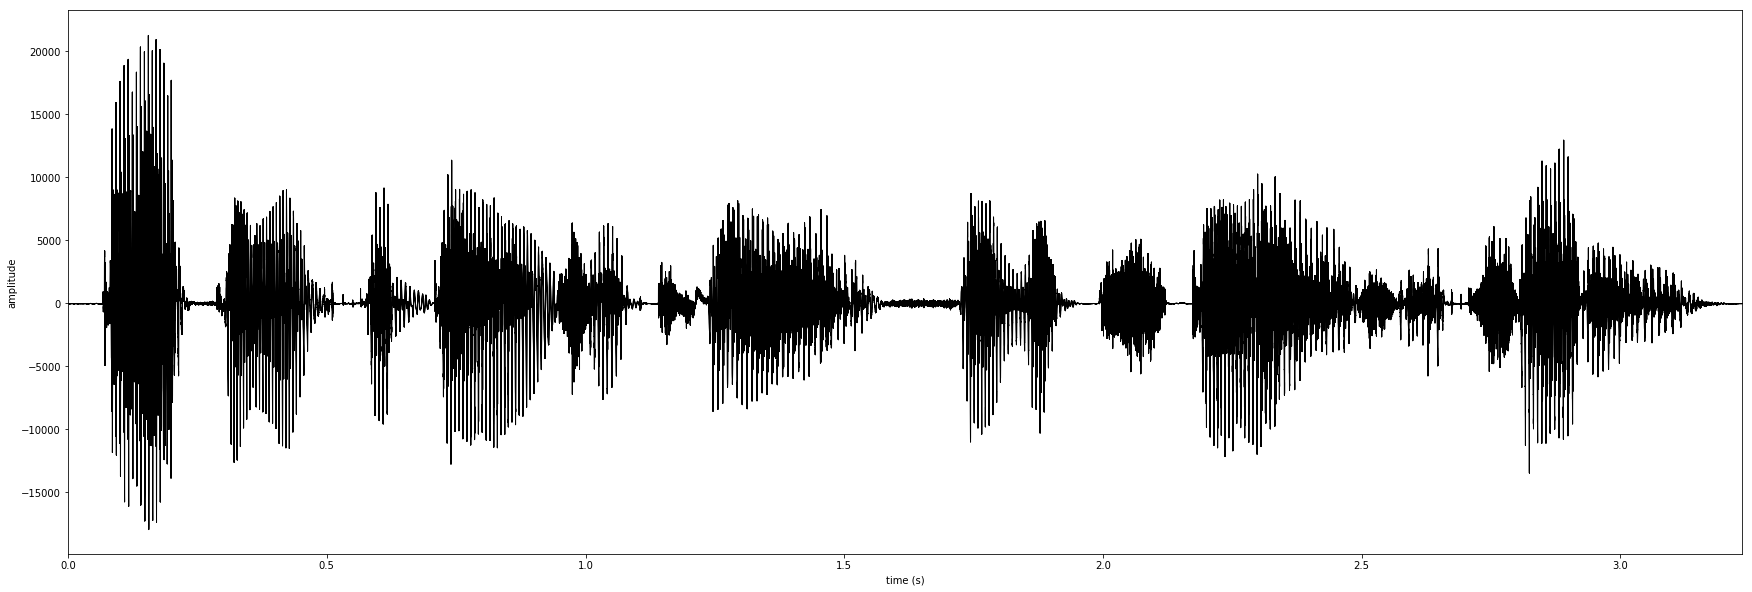

In [9]:
plot_amp("male",1)

In [10]:
# We'll need numpy for some mathematical operations
import numpy as np


# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline


# and IPython.display for audio output
import IPython.display


# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [11]:
y, sr = librosa.load(get_en_filepath("female",1))
y2, sr2 = librosa.load(get_en_filepath("male",1))

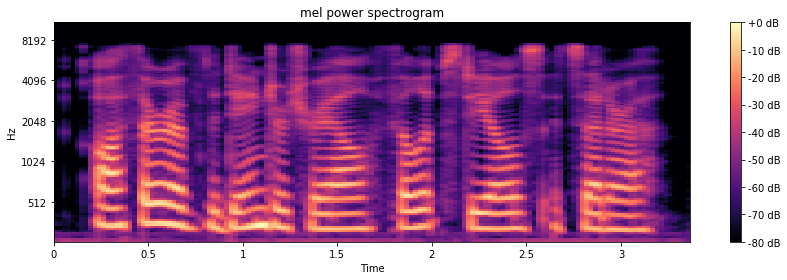

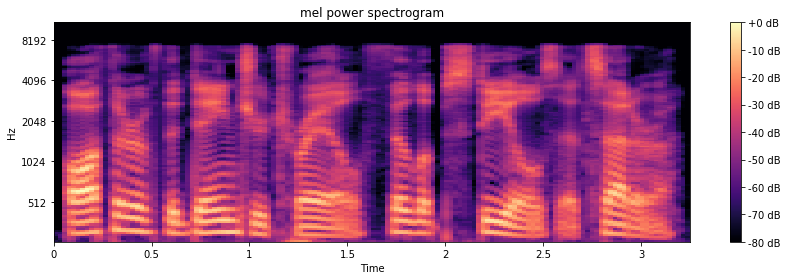

In [12]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128);

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max);

# Make a new figure
plt.figure(figsize=(12,4));

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel');

# Put a descriptive title on the plot
plt.title('mel power spectrogram');

# draw a color bar
plt.colorbar(format='%+02.0f dB');

# Make the figure layout compact
plt.tight_layout();




# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y2, sr=sr2, n_mels=128)

# Convert to log scale (dB). We'll use the peak power as reference.
log_S = librosa.logamplitude(S, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,4));

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr2, x_axis='time', y_axis='mel');

# Put a descriptive title on the plot
plt.title('mel power spectrogram');

# draw a color bar
plt.colorbar(format='%+02.0f dB');

# Make the figure layout compact
plt.tight_layout();



In [13]:
y_harmonic, y_percussive = librosa.effects.hpss(y)
y_harmonic2, y_percussive2 = librosa.effects.hpss(y2)

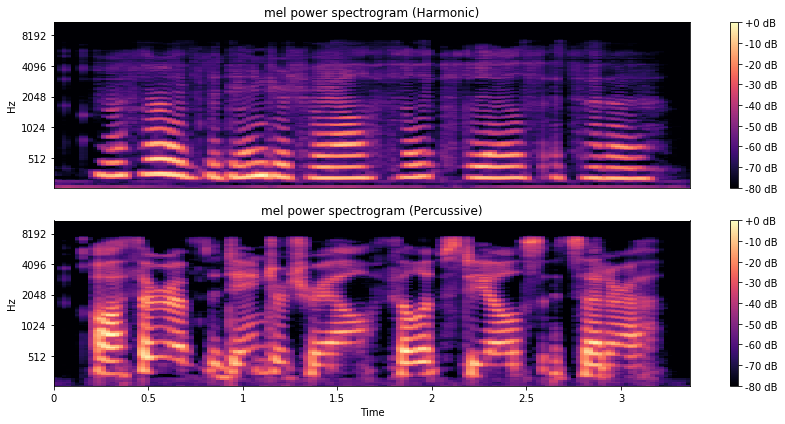

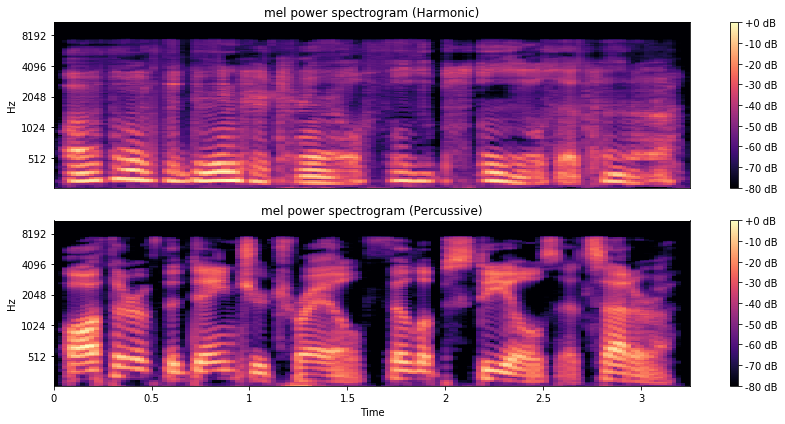

In [14]:
# What do the spectrograms look like?
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.logamplitude(S_harmonic, ref_power=np.max)
log_Sp = librosa.logamplitude(S_percussive, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,6));

plt.subplot(2,1,1);
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel');

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)');

# draw a color bar
plt.colorbar(format='%+02.0f dB');

plt.subplot(2,1,2);
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel');

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)');

# draw a color bar
plt.colorbar(format='%+02.0f dB');

# Make the figure layout compact
plt.tight_layout();




# What do the spectrograms look like?
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_harmonic   = librosa.feature.melspectrogram(y_harmonic2, sr=sr2)
S_percussive = librosa.feature.melspectrogram(y_percussive2, sr=sr2)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.logamplitude(S_harmonic, ref_power=np.max)
log_Sp = librosa.logamplitude(S_percussive, ref_power=np.max)

# Make a new figure
plt.figure(figsize=(12,6));

plt.subplot(2,1,1);
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr2, y_axis='mel');

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)');

# draw a color bar
plt.colorbar(format='%+02.0f dB');

plt.subplot(2,1,2);
librosa.display.specshow(log_Sp, sr=sr2, x_axis='time', y_axis='mel');

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)');

# draw a color bar
plt.colorbar(format='%+02.0f dB');

# Make the figure layout compact
plt.tight_layout();

In [1]:
# We'll use a CQT-based chromagram here.  An STFT-based implementation also exists in chroma_cqt()
# We'll use the harmonic component to avoid pollution from transients
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# Make a new figure
plt.figure(figsize=(12,4));

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1);

plt.title('Chromagram');
plt.colorbar();

plt.tight_layout();



# We'll use a CQT-based chromagram here.  An STFT-based implementation also exists in chroma_cqt()
# We'll use the harmonic component to avoid pollution from transients
C = librosa.feature.chroma_cqt(y=y_harmonic2, sr=sr2)

# Make a new figure
plt.figure(figsize=(12,4));

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr2, x_axis='time', y_axis='chroma', vmin=0, vmax=1);

plt.title('Chromagram');
plt.colorbar();

plt.tight_layout();

NameError: name 'librosa' is not defined

In [16]:
from __future__ import print_function
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
y, sr = librosa.load(get_en_filepath("female",4))
y2, sr2 = librosa.load(get_en_filepath("male",4))

In [17]:
# Play it back!
IPython.display.Audio(data=y, rate=sr)
IPython.display.Audio(data=y2, rate=sr2)

# # How about separating harmonic and percussive components?
# y_h, y_p = librosa.effects.hpss(y)

# # Play the harmonic component
# IPython.display.Audio(data=y_h, rate=sr)

# # Play the percussive component
# IPython.display.Audio(data=y_p, rate=sr)

# Pitch shifting?  Let's gear-shift by a major third (4 semitones)
y_shift = librosa.effects.pitch_shift(y, sr, -7, bins_per_octave=12)

IPython.display.Audio(data=y_shift, rate=sr)


# Pitch shifting?  Let's gear-shift by a major third (4 semitones)
y_shift = librosa.effects.pitch_shift(y2, sr2, +7, bins_per_octave=12)

IPython.display.Audio(data=y_shift, rate=sr2)

# # Or time-stretching?  Let's slow it down
# y_slow = librosa.effects.time_stretch(y, 0.7)

# IPython.display.Audio(data=y_slow, rate=sr)